   Age  Gender       GPA  Extracurricular Activities  Activity Participation
0   22    Male  3.572715                           4                       0
1   23    Male  3.337077                           1                       1
2   18    Male  3.557422                           0                       0
3   21  Female  3.127955                           3                       0
4   21  Female  2.507965                           0                       1

Accuracy: 0.48

Prediction:
 [0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1
 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0]

Classification Report:
              precision    recall  f1-score   support

           0       0.4

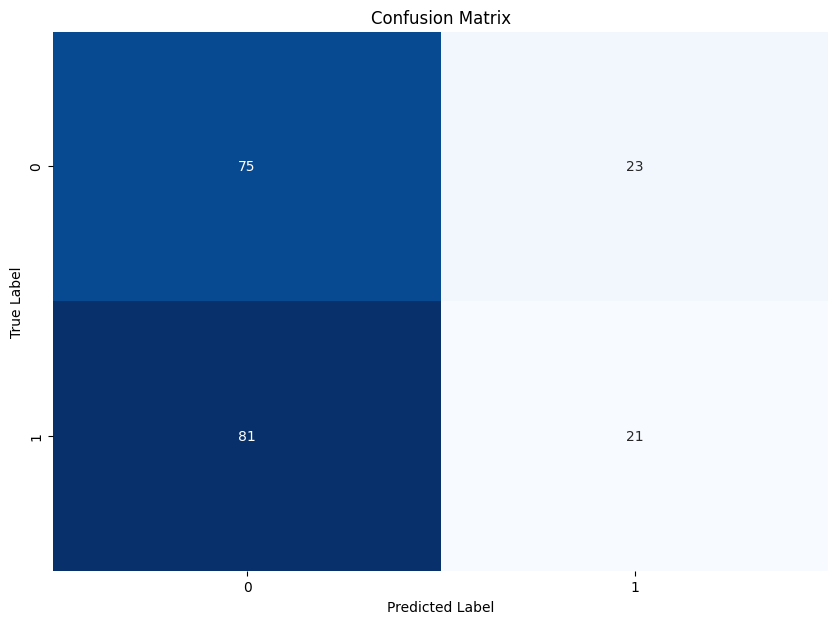

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generating a synthetic student dataset
np.random.seed(0)
num_students = 1000
age = np.random.randint(18, 25, num_students)
gender = np.random.choice(['Male', 'Female'], num_students)
gpa = np.random.uniform(2.5, 4.0, num_students)
extracurricular_activities = np.random.randint(0, 5, num_students)
activity_participation = np.random.choice([0, 1], num_students)

data = pd.DataFrame({
    'Age': age,
    'Gender': gender,
    'GPA': gpa,
    'Extracurricular Activities': extracurricular_activities,
    'Activity Participation': activity_participation
})
print(data.head())
# One-hot encoding for 'Gender' variable
data = pd.get_dummies(data, columns=['Gender'])

# Splitting the dataset into features and target variable
X = data.drop(columns=['Activity Participation'])
y = data['Activity Participation']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the logistic regression model
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

# Evaluating the model
accuracy = model.score(X_test, y_test)
print("\nAccuracy:", accuracy)

# Making predictions
y_pred = model.predict(X_test)
print("\nPrediction:\n",y_pred)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Creating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizing confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
